# Minimal example for reading data from EXYZ.txt file

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import os
import sys

angstrom_to_cm_factor = 1e-8
keV_to_MeV_factor = 1e-3
eV_to_MeV_factor = 1e6
# EXYZ_PATH = "DataFiles/EXYZ.txt"
# EXYZ_PATH = "DataFiles\EXYZ_He4-15.0MeV_2023-05-03_1007.txt"
EXYZ_PATH = "DataFiles\EXYZ_Sr80-1200.0MeV_2023-05-03_1017.txt"
# Read the data
df = pd.read_csv(
    EXYZ_PATH,
    sep="\s+",
    header=None,
    names=[
        "Ion Number",
        "Energy",
        "Depth",
        "Y",
        "Z",
        "Electronic Stop.",
        "Recoil Energy",
    ],
    engine="python",
    skiprows=15,
    converters={
        "Ion Number": lambda x: int(x.replace(",", ".")),
        "Energy": lambda x: float(x.replace(",", "."))*keV_to_MeV_factor,
        "Depth": lambda x: float(x.replace(",", "."))*angstrom_to_cm_factor,
        "Y": lambda x: float(x.replace(",", "."))*angstrom_to_cm_factor,
        "Z": lambda x: float(x.replace(",", "."))*angstrom_to_cm_factor,
        "Electronic Stop.": lambda x: float(x.replace(",", "."))/angstrom_to_cm_factor,
        "Recoil Energy": lambda x: float(x.replace(",", ".")),
    },
)
# df.groupby("Ion Number")
# df.describe()
df_group = df.groupby(["Ion Number"])

def modify_data(df: pd.DataFrame):
    df["dE"] = df["Energy"].diff()
    df["dx"] = df["Depth"].diff()
    df['dE/dx'] = -df['dE']/df['dx']
    return df

def extend_data(df: pd.DataFrame):
    df_ext = pd.DataFrame()
    tail_length = 20
    dEdx_tail = pd.DataFrame(np.zeros((tail_length, 1)), columns=['dE/dx'])
    extended_dEdx = pd.concat([df['dE/dx'], dEdx_tail['dE/dx']], ignore_index=True)
    df_ext['dE/dx'] = extended_dEdx
    last_depth = df['Depth'].iloc[-1]
    depth_tail = pd.DataFrame(np.linspace(last_depth, last_depth + tail_length*df['dx'].mean(), tail_length), columns=['Depth'])
    df_ext['Depth'] = pd.concat([df['Depth'], depth_tail['Depth']], ignore_index=True)
    return df_ext

#### Plot individual ions

C:\Users\jakob\AppData\Local\Temp\ipykernel_55060\3890765943.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dE"] = df["Energy"].diff()
C:\Users\jakob\AppData\Local\Temp\ipykernel_55060\3890765943.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dx"] = df["Depth"].diff()
C:\Users\jakob\AppData\Local\Temp\ipykernel_55060\3890765943.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

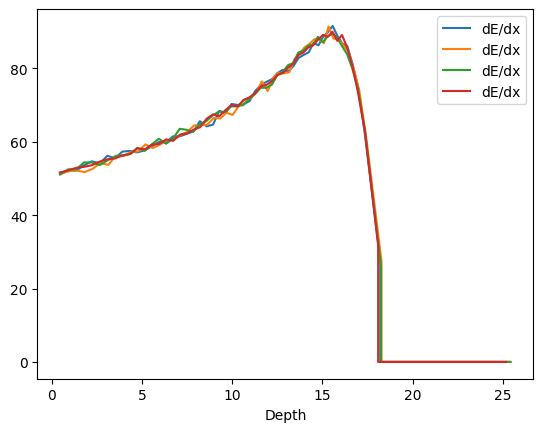

In [18]:
# Plot individual ions
df_1 = modify_data(df_group.get_group(1))
df_1 = extend_data(df_1)
ax = df_1.plot(x='Depth', y='dE/dx')
for i in range(2,5):
    df_i = modify_data(df_group.get_group(i))
    df_i = extend_data(df_i)
    df_i.plot(x='Depth', y='dE/dx', ax=ax)

## Plot average of all ions, wip

C:\Users\jakob\AppData\Local\Temp\ipykernel_55060\3890765943.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dE"] = df["Energy"].diff()
C:\Users\jakob\AppData\Local\Temp\ipykernel_55060\3890765943.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dx"] = df["Depth"].diff()
C:\Users\jakob\AppData\Local\Temp\ipykernel_55060\3890765943.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

    Ion Number    Energy     Depth         Y         Z  Electronic Stop.  \
0            1  1200.000   0.00000  0.000000  0.000000        51093000.0   
1            1  1176.400   0.45829  0.000045  0.000133        51659000.0   
2            1  1152.900   0.91053  0.000137  0.000422        52232000.0   
3            1  1129.300   1.36300  0.000285  0.000373        52816000.0   
4            1  1105.700   1.80320  0.000566 -0.000072        53413000.0   
5            1  1082.300   2.23130  0.000802 -0.000487        54013000.0   
6            1  1058.800   2.66540  0.001209 -0.000881        54630000.0   
7            1  1035.100   3.08740  0.001697 -0.001133        55262000.0   
8            1  1011.700   3.50900  0.002171 -0.001585        55899000.0   
9            1   987.900   3.92430  0.002220 -0.002113        56558000.0   
10           1   964.390   4.33320  0.002275 -0.002813        57223000.0   
11           1   941.080   4.74140  0.002407 -0.003688        57896000.0   
12          

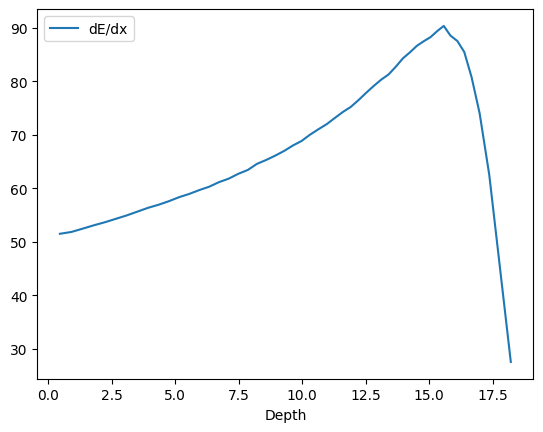

In [19]:


# Plot average of all ions
# df_new = df_group.get_group(1)
# mod = modify_data(df_new)
ion_dfs = [modify_data(df_group.get_group(ion)) for ion in df_group.groups]
print(ion_dfs[0])

def compute_average():
    """Compute the average of dE/dx for each depth over all ions"""
    # Create a new dataframe with the average dE/dx
    df_avg = pd.DataFrame()
    df_avg['Depth'] = ion_dfs[0]['Depth']
    df_avg["dx"] = ion_dfs[0]["dx"]
    df_avg['dE/dx'] = np.zeros(len(df_avg['Depth']))
    for i in range(len(df_avg['Depth'])):
        df_avg['dE/dx'].iloc[i] = np.mean([ion_df['dE/dx'].iloc[i] for ion_df in ion_dfs])
    return df_avg

df_avg = compute_average()

# Plot the average
ax = df_avg.plot(x='Depth', y='dE/dx')


# # Plot individual ions
# df_1 = modify_data(df_group.get_group(1))
# ax = df_1.plot(x='Depth', y='dE/dx')
# for i in range(2,10):
#     df_i = modify_data(df_group.get_group(i))
#     df_i.plot(x='Depth', y='dE/dx', ax=ax)

# df_i = df_group.get_group(i)
# df_i["dE"] = df_i["Energy"].diff()
# df_i["dx"] = df_i["Depth"].diff()
# df_i['dE/dx'] = -df_i['dE']/df_i['dx']
# df_i.plot(x='Depth', y='dE/dx', ax=ax)



<Axes: xlabel='Y', ylabel='Z'>

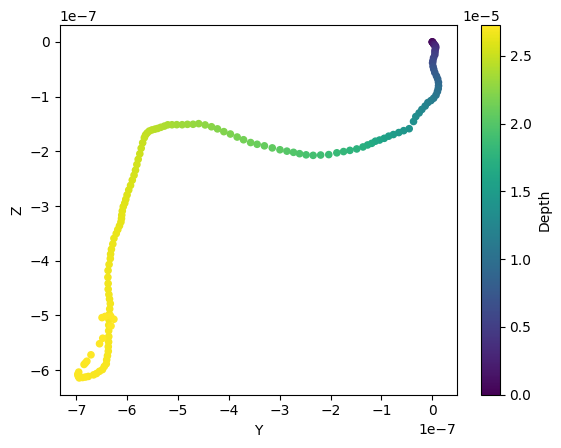

In [11]:
df_i.plot(x="Y", y="Z", kind="scatter", c="Depth", cmap="viridis")